**NOTE: This notebook is written for the Google Colab platform, which provides free hardware acceleration. However it can also be run (possibly with minor modifications) as a standard Jupyter notebook, using a local GPU.**

In [0]:
#@title -- Installation of Packages -- { display-mode: "form" }
import sys
!{sys.executable} -m pip install git+https://github.com/michalgregor/class_utils.git

  Cloning https://github.com/michalgregor/class_utils.git to /tmp/pip-req-build-79l35rdt
  Running command git clone -q https://github.com/michalgregor/class_utils.git /tmp/pip-req-build-79l35rdt
     |████████████████████████████████| 276kB 2.7MB/s 
     |████████████████████████████████| 112kB 12.5MB/s 
     |████████████████████████████████| 57.7MB 65kB/s 
     |████████████████████████████████| 2.0MB 44.7MB/s 
  Created wheel for class-utils: filename=class_utils-0.1-cp36-none-any.whl size=6463 sha256=40f988baf51f9d039f4faa202c8b28a7a18aebea61e3b8de1952e97b0c72b329
  Stored in directory: /tmp/pip-ephem-wheel-cache-iiemarh3/wheels/0c/d3/63/b380d96ed74ced47fcdb67bfb9aee184bfdc970b956a65096d
  Created wheel for lime: filename=lime-0.2.0.0-cp36-none-any.whl size=284181 sha256=fdb327f4df0c087464bdb71acdcc815ebbb1190d3287e223a31ada61cfbcdbf6
  Stored in directory: /root/.cache/pip/wheels/22/f2/ec/e5ebd07348b2b1ac722e91c2f549fcc220f7d5f25497a61232
  Created wheel for pdpbox: filename=PDPb

In [0]:
#@title -- Import of Necessary Packages -- { display-mode: "form" }
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from class_utils import show_tree

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
#@title -- Downloading Data -- { display-mode: "form" }
!mkdir -p output
!mkdir -p data/titanic
!wget -nc -O data/titanic.zip https://www.dropbox.com/s/u8u7vcwy3sosbar/titanic.zip?dl=1
!unzip -oq -d data/titanic data/titanic.zip

--2020-04-20 13:18:59--  https://www.dropbox.com/s/u8u7vcwy3sosbar/titanic.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/u8u7vcwy3sosbar/titanic.zip [following]
--2020-04-20 13:18:59--  https://www.dropbox.com/s/dl/u8u7vcwy3sosbar/titanic.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc909721e38ff8ab8a93b8eee209.dl.dropboxusercontent.com/cd/0/get/A2PLyAe2uKsfshZM4QU7Xsw-KEGlqIC2Vl38-IHkDeBwsS6aJMshH2-GUR0ZgcPwluT-aXb811f6sc9rlKV-PR7MUM3P9fbxKWEPr2rl8gJ_NI6FdkQSCgvyHprYw1_bBRI/file?dl=1# [following]
--2020-04-20 13:19:00--  https://uc909721e38ff8ab8a93b8eee209.dl.dropboxusercontent.com/cd/0/get/A2PLyAe2uKsfshZM4QU7Xsw-KEGlqIC2Vl38-IHkDeBwsS6aJMshH2-GUR0ZgcPwluT-aXb811f6sc9rlKV-PR7MUM3P9fbxKWEPr2rl8gJ_NI6F

# Decision Trees for Classification

We will now show how to apply a decision tree classifier to the [Titanic](https://www.kaggle.com/c/titanic) dataset. Given that we have already explored this dataset in a previous example and we already know how to preprocess it, we will not repeat the exercise. The code necessary to load and preprocess the data is in the next cell and it is hidden for conciseness.

In [0]:
#@title -- Preprocessing the Data -- { display-mode: "form" }
df = pd.read_csv("data/titanic/train.csv")
df_train, df_test = train_test_split(df, test_size=0.25,
                     stratify=df["Survived"], random_state=4)

categorical_inputs = ["Pclass", "Sex", "Embarked"]
numeric_inputs = ["Age", "SibSp", 'Parch', 'Fare']
class_names = ["died", "survived"]

output = "Survived"

input_preproc = make_column_transformer(
    (make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OrdinalEncoder()),
     categorical_inputs),
    
    (make_pipeline(
        SimpleImputer(),
        StandardScaler()),
     numeric_inputs)
)

X_train = input_preproc.fit_transform(df_train[categorical_inputs+numeric_inputs])
Y_train = df_train[output].values.reshape(-1)

X_test = input_preproc.transform(df_test[categorical_inputs+numeric_inputs])
Y_test = df_test[output].values.reshape(-1)

## Training

Literally the only thing that we need to change at this point w.r.t. the previous example is to use a ``DecisionTreeClassifier`` instead of the ``KNeighborsClassifier``. The rest of the code can stay the same.

In [0]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Testing

The code to test the model can be copied verbatim as well.

In [0]:
y_test = model.predict(X_test)

cm = pd.crosstab(Y_test, y_test,
                 rownames=['actual'],
                 colnames=['predicted'])
print(cm, "\n")

acc = accuracy_score(Y_test, y_test)
print("Accuracy = {}".format(acc))

predicted    0   1
actual            
0          114  23
1           26  60 

Accuracy = 0.7802690582959642


The accuracy achieved by our decision tree classifier is not great. In fact, chances are that it will be lower than that achieved in our KNN example. This is very suspicious indeed and it might mean that our model has overfitted. To check whether this is the case, we should test our model on the training set. If the results are much better, that will indicate overfitting and we will need to modify the hyperparameters of the decision tree so as to decrease its capacity and get a model that generalizes.

In [0]:
y_train = model.predict(X_train)

acc_train = accuracy_score(Y_train, y_train)
print("Accuracy = {}".format(acc_train))

Accuracy = 0.9790419161676647


As it turns out, the accuracy on the training set is indeed much higher, which indicates overfitting. We can also visualize the resulting tree to examine how complex it is. We will use an auxiliary function ``show_tree``. The tree is likely to be quite complex and difficult to read.

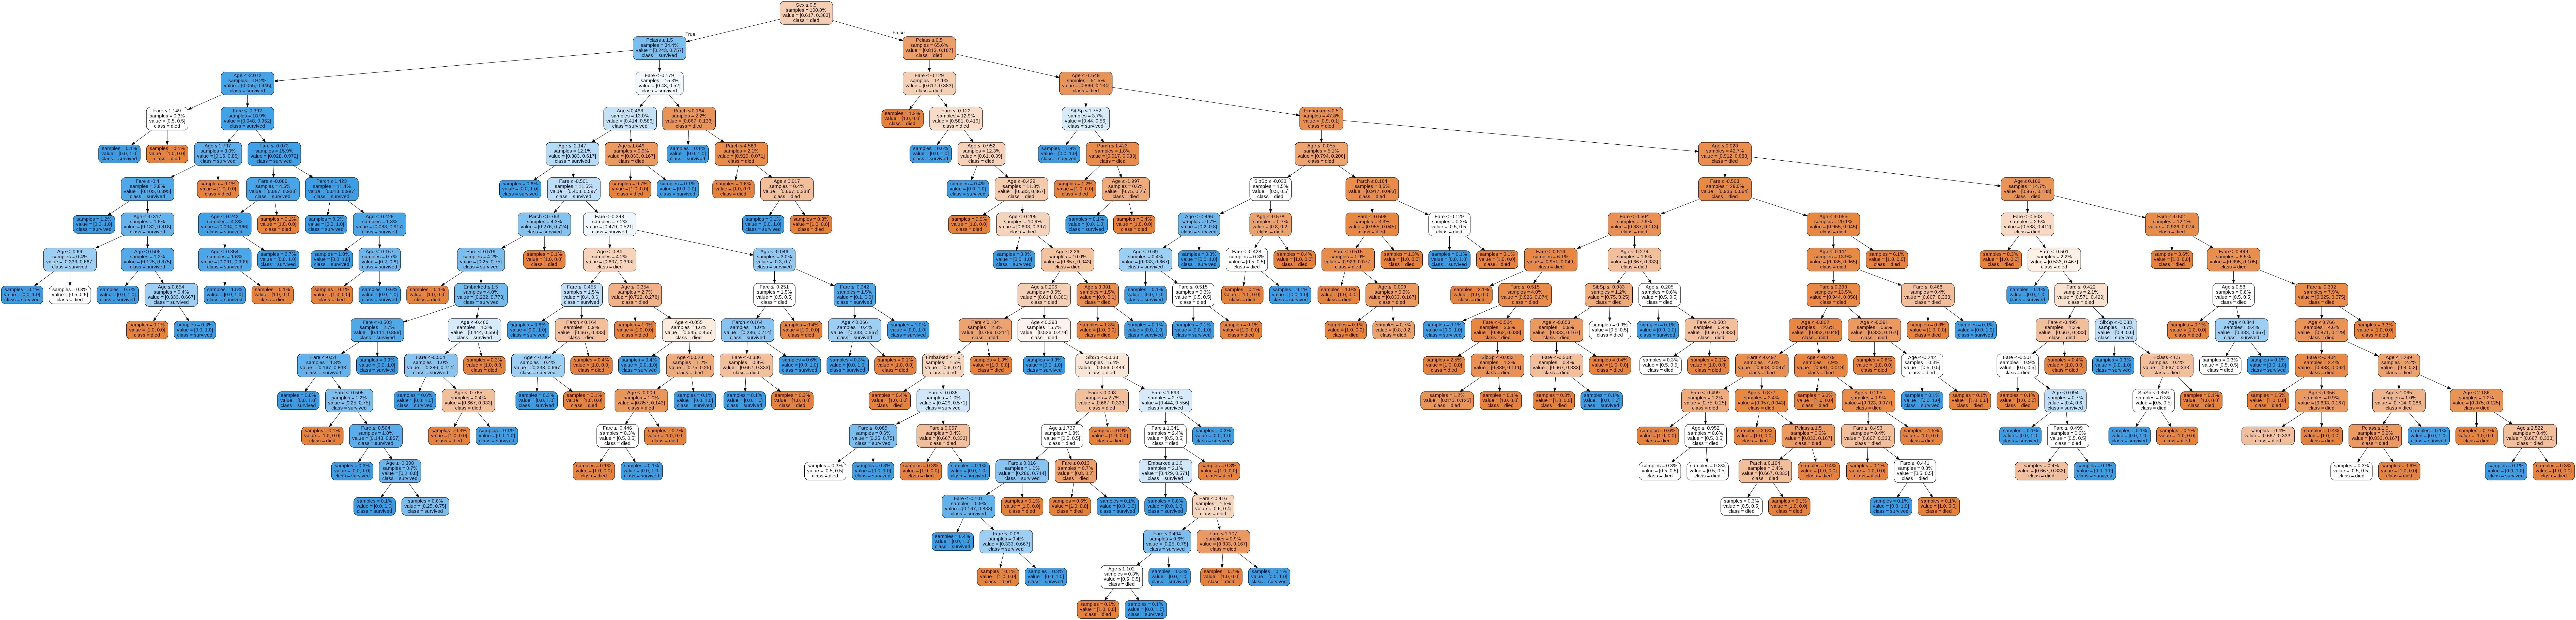

In [0]:
show_tree(model,
  feature_names=categorical_inputs+numeric_inputs,
  class_names=class_names)

## Tuning the Hyperparameters to Do More Pruning

As the next step we will show how to tune hyperparameters of the decision tree to make it simpler and to prevent it from overfitting. This is achieved using pruning, which can come in two different flavors:
* **pre-pruning**: as the tree is grown, new branches are prevented from being formed unless some pre-specified criteria are met;
* **post-pruning**: the tree is grown fully and branches are removed from it afterwards.

In this example we will only be using pre-pruning and its parameters will be specified in the constructor of the ``DecisionTreeClassifier``.

### Using Cross-Validation

When tuning the hyperparameters, we will need a way to determine which parameters work. We cannot test each different setting on the testing set: recall that we are only allowed to use it once – to test the final model.

We basically have 2 options:
* To split the dataset into 3 parts: the training set, the validation set and the testing set (the validation set would be used to tune the hyperparameters and the testing set would be used at the end to verify that the final model generalizes).
* To use cross-validation: The training set would be split into $k$ folds and then the model would be trained on $k-1$ folds and tested on the remaining fold. This would be repeated for all combinations of folds and the results would be averaged.

Since decision trees are cheap to train and our dataset is not too large, in the present example we will use cross-validation. Let us have a look at how it is applied in ``scikit-learn``. We will use the ``sklearn.model_selection.cross_validate`` function and specify ``cv=5``, which means that there will be $k = 5$ folds. The function will return the accuracies on all of the folds. We will compute the mean of these and use that as an indicator of how well our model is doing.

In [0]:
cross_validate(model, X_train, Y_train, cv=5)['test_score'].mean()

0.7889574682976097

### Changing the Hyperparameters

Now let's do some actual hyperparameter tuning. To see what we can change when constructing the decision tree, we will have a look at its documentation.

In [0]:
print(DecisionTreeClassifier.__doc__)

A decision tree classifier.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    criterion : {"gini", "entropy"}, default="gini"
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "entropy" for the information gain.

    splitter : {"best", "random"}, default="best"
        The strategy used to choose the split at each node. Supported
        strategies are "best" to choose the best split and "random" to choose
        the best random split.

    max_depth : int, default=None
        The maximum depth of the tree. If None, then nodes are expanded until
        all leaves are pure or until all leaves contain less than
        min_samples_split samples.

    min_samples_split : int or float, default=2
        The minimum number of samples required to split an internal node:

        - If int, then consider `min_samples_split` as the minimum number.
        - If float, then `min_samples_spli

The minimum number of samples for a leaf (``min_samples_leaf``) seems like a good candidate: if we make a prediction based on a very small amount of samples, it is likely not to be representative. You can, of course, also try to experiment with other parameters such as the maximum depth of the tree and so on.

---

### Task 1: Tune ``min_samples_leaf``

**In the cell below, experiment with different values of ``min_samples_leaf`` and select try to maximize the cross-validation accuracy. Also observe the effect of the hyperparameter on the structure of the tree.**

---

[25 26 27 28 29]
Cross-validation accuracy = 0.812894175737852


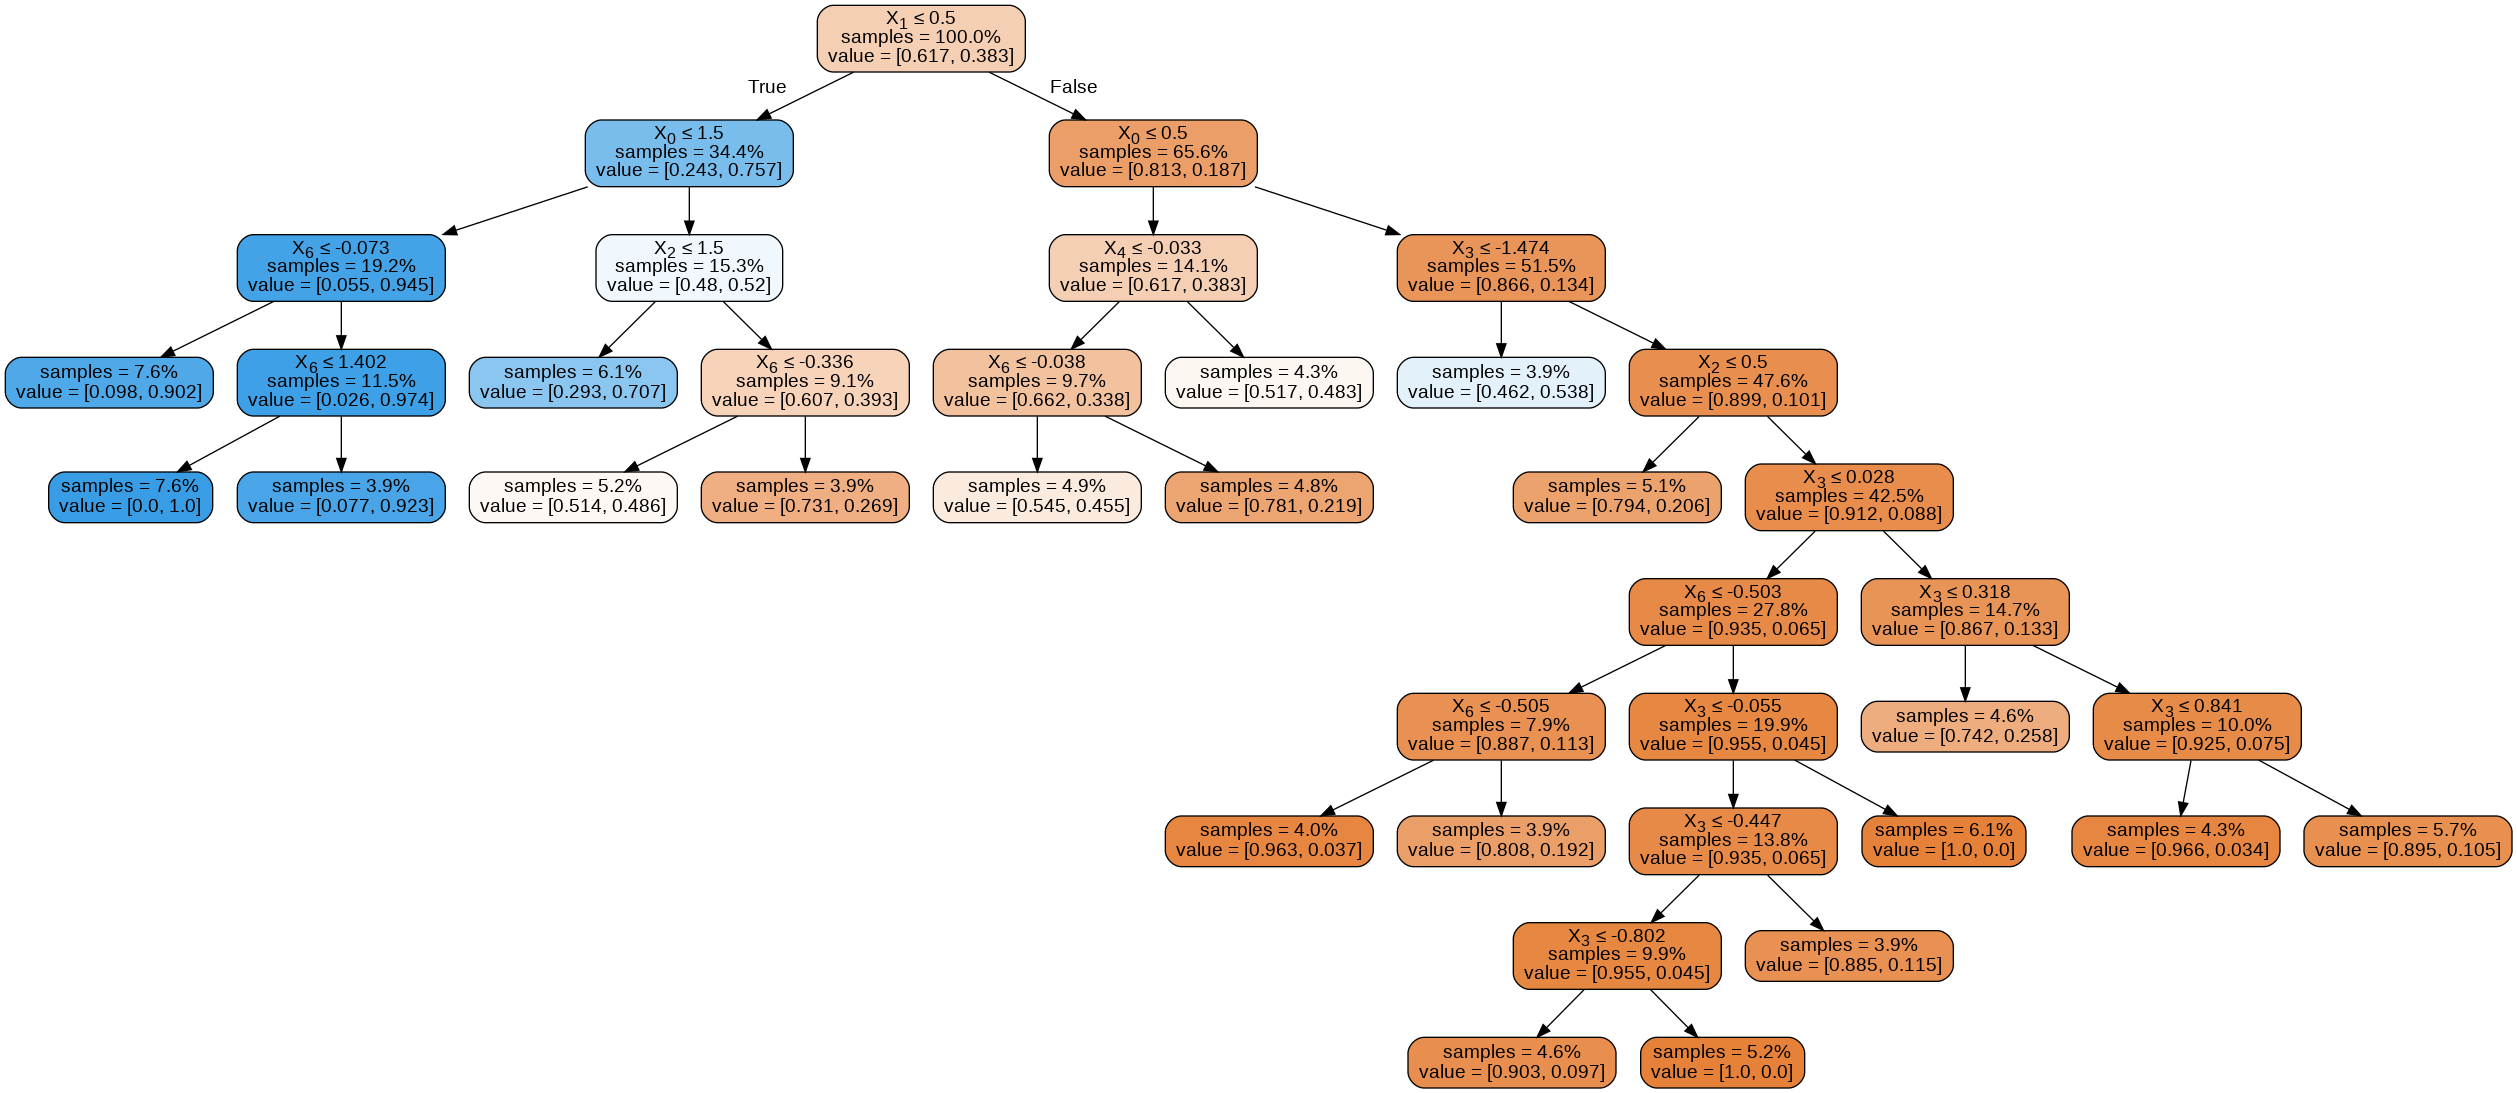

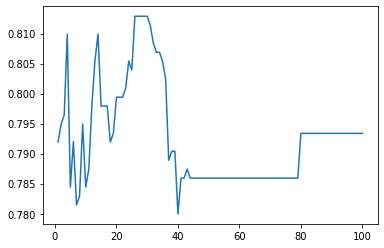

In [0]:
import matplotlib.pyplot as plt

samples = np.arange(1,101)
accuracy = np.zeros(100)

j = 0
for i in samples:
  model = DecisionTreeClassifier(min_samples_leaf=i)
  accuracy[j] = cross_validate(model, X_train, Y_train, cv=5)['test_score'].mean()
  j=j+1

#plt.plot(samples, accuracy)

max_acc_index = np.where(accuracy == np.amax(accuracy))
print(max_acc_index[0])

#-------------

model = DecisionTreeClassifier(
      
      
    min_samples_leaf=26
      
      
)

acc = cross_validate(model, X_train, Y_train, cv=5)['test_score'].mean()
print("Cross-validation accuracy = {}".format(acc))

# we need to fit the model before we plot it
model.fit(X_train, Y_train)
show_tree(model)

## Testing the Tuned Tree

Having tuned the hyperparameters, we can now verify how well our final model actually generalizes. We re-train the model with the best hyperparameters on the entire training set and evaluate the accuracy on the testing set. The results should be substantially better now.

In [0]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=26, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_test = model.predict(X_test)
accuracy_score(Y_test, y_test)

0.8116591928251121